<a href="https://colab.research.google.com/github/lingchm/datascience/blob/master/exercises/socially_distanced_robots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Socially Distanced Robots

*Descentralized distributed computing*, *Convex optimization*, *Gradient Descent*, *Nesterov's Method*

**Problem**

Let there be $N$ robots located on a 2D grid. Denote $p^{(n)}, n=1, \dots, N$, the location vector of the n-th robot. Initially, robots are randomly located in the grid. We want to move the robots so that they eventually get as close to each other as possible but with a distance $\delta \geq 0$ away from each other (socially-distanced). The communication is distributed. In other words, robot $j$ can only communicate with its neighbor nodes, $N_j$.

**Method**

We formulate the following optimization problem.
\begin{equation}
\min_{p \in \mathbb{R}^{Nx2}} \sum^N_{n=1} \sum_{m \in N_n} \left(  ||p^{(n)} - p^{(m)} ||_2^2 - \delta^2 \right )^2.
\end{equation}

We implement gradient descent and Nesterov's method to solve this problem.

**References**

Credits to Dr. Justin Romberg for designing this problem.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# initialize 10 robots 
np.random.seed(2021)
p = np.random.uniform(0,50,[2,10])

In [4]:
# utility function 
def plotRobots(p, title="", size=50):
    plt.scatter(p[0], p[1])
    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.title(title)
    plt.show()
    return

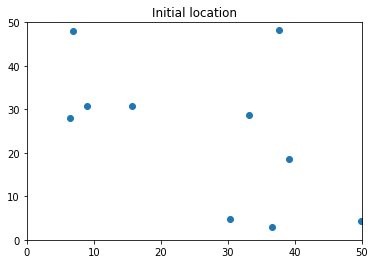

In [5]:
# visualize initial locations
plotRobots(p, "Initial location", size=50)

In [1]:
# computes the gradient of the objective function
def grad_f(p, dist):
    grad = np.zeros(p.shape)
    # for each robot
    for i in range(p.shape[1]):
        # for each of this robot's neighbors (all other robots)
        for j in range(p.shape[1]):
            grad[:, i] += (np.linalg.norm(p[:,i] - p[:,j])**2 - dist**2) \
                          * (p[:,i] - p[:,j])
    return grad
    
# solver using GD or Nesterov
def swarmRobots(p0, alpha=0.001, dist=6, tol=10, max_iter=500, method='SG'):
    k, pk, pk_ = 0, p0*1, p0*0
    while k < max_iter: #np.linalg.norm(pk - pk_) > tol and 
        #plotRobots(pk, title="Iteration " + str(k))
        if method == 'SG':
            pk_ = pk * 1
            pk += - alpha * grad_f(pk, dist)
        elif method == 'Nesterov':
            beta = (k - 1) / (k + 2)
            p = pk - pk_
            pk_ = pk * 1
            pk += - alpha * grad_f(pk + beta * p, dist) + beta * p
        k += 1
    print("Final p:", pk)
    return pk

Final p: [[24.53544765 29.44654126 23.64196614 23.94469662 28.7245668  29.5775933
  24.77005686 23.8062581  29.28216491 27.00884428]
 [27.53617418 22.55457794 26.71587272 22.34570501 21.7642784  25.94788795
  21.64749776 22.51131782 26.44053401 27.94386986]]


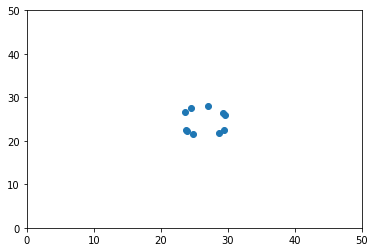

In [7]:
# results using gradient descent
pk = swarmRobots(p, alpha=0.0001)
plotRobots(pk)

Final p: [[12.99422015 13.6486386  12.59091656 10.20368704 15.89665403  9.97944042
   9.77390326 15.06150581 15.53859274 16.68150935]
 [ 8.8141172   8.83013161 15.67412462 13.94244663 10.05079455 11.09361083
  12.31714099 15.21533353 14.85940514 11.90675272]]


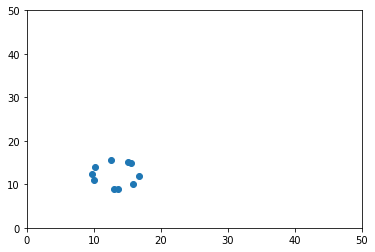

In [8]:
# results using nesterov
pk = swarmRobots(p, alpha=0.0001, method='Nesterov')
plotRobots(pk)

**Discussion**

The robots seem to converge to a configuration which is more evenly spaced.

While Newton's method generally results in faster convergence, one of the key benefit of the first-order methods described above is that the gradient updates require only local information (i.e., the update for each robot will
depend only on its distance from the other robots in its neighborhood). 

Could we have usen Newton's method, which would only require a few iterations? In general, the inverse Hessian matrix will not preserve this local structure, and hence actually computing the update in practice would involve signi cantly more communication between the robots.